In [110]:
import pandas as pd
from datetime import datetime
import plotly.express as px
import matplotlib.pyplot as plt
plt.close("all")

# ESTUDOS USANDO DADOS DIEESE
## Carregando dados e tratando tabelas

In [119]:
dieese_salarios = pd.read_excel('dieese_salario_real.xlsx')
dieese_salarios

,Mes,Ano,Salário mínimo nominal,Salário mínimo necessário
0,Maio,2021,"R$ 1.100,00","R$ 5351,11"
1,Abril,2021,"R$ 1.100,00","R$ 5.330,69"
2,Março,2021,"R$ 1.100,00","R$ 5.315,74"
3,Fevereiro,2021,"R$ 1.100,00","R$ 5.375,05"
4,Janeiro,2021,"R$ 1.100,00","R$ 5.495,52"
...,...,...,...,...
318,Novembro,1994,"R$ 70,00","R$ 744,25"
319,Outubro,1994,"R$ 70,00","R$ 740,83"
320,Setembro,1994,"R$ 70,00","R$ 695,64"
321,Agosto,1994,"R$ 64,79","R$ 645,53"


### Normalizando nomes de colunas e removendo acentos

In [120]:
dieese_salarios.columns = ['_'.join(word.upper() for word in x.split()) for x in dieese_salarios.columns]
dieese_salarios.columns = dieese_salarios.columns.str.replace('Á', 'A', regex=True)
dieese_salarios.columns = dieese_salarios.columns.str.replace('Í', 'I', regex=True)
dieese_salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   MES                        323 non-null    object
 1   ANO                        323 non-null    int64 
 2   SALARIO_MINIMO_NOMINAL     323 non-null    object
 3   SALARIO_MINIMO_NECESSARIO  323 non-null    object
dtypes: int64(1), object(3)
memory usage: 10.2+ KB


### Convertendo tipos de colunas para estampas de data

In [121]:
dicionario_mes = {
    'Janeiro': 1,
    'Fevereiro': 2,
    'Março': 3,
    'Abril': 4,
    'Maio': 5,
    'Junho': 6,
    'Julho': 7,
    'Agosto': 8,
    'Setembro': 9,
    'Outubro': 10,
    'Novembro': 11,
    'Dezembro': 12
}
dieese_salarios["DATA"] = [datetime(year=ano, month=mes, day=1) for ano, mes in zip(dieese_salarios["ANO"], dieese_salarios["MES"].map(dicionario_mes))]
dieese_salarios = dieese_salarios.drop(['MES', 'ANO'], axis=1)

### Convertendo valores para números em ponto flutuante

In [124]:
coluna_sem_virgula = dieese_salarios["SALARIO_MINIMO_NOMINAL"].replace('[,]\d+', '', regex=True)
dieese_salarios["SALARIO_MINIMO_NOMINAL"] = coluna_sem_virgula.replace('[R\$\.]', '', regex=True).astype(float)
coluna_sem_virgula = dieese_salarios["SALARIO_MINIMO_NECESSARIO"].replace('[,]\d+', '', regex=True)
dieese_salarios["SALARIO_MINIMO_NECESSARIO"] = coluna_sem_virgula.replace('[R\$\.]', '', regex=True).astype(float)
dieese_salarios

,SALARIO_MINIMO_NOMINAL,SALARIO_MINIMO_NECESSARIO,DATA
0,1100.0,5351.0,2021-05-01
1,1100.0,5330.0,2021-04-01
2,1100.0,5315.0,2021-03-01
3,1100.0,5375.0,2021-02-01
4,1100.0,5495.0,2021-01-01
...,...,...,...
318,70.0,744.0,1994-11-01
319,70.0,740.0,1994-10-01
320,70.0,695.0,1994-09-01
321,64.0,645.0,1994-08-01


### Desenhando gráficos a partir do estado atual dos dados

In [127]:
dieese_salarios_indexados = dieese_salarios.set_index("DATA")
dieese_salarios_indexados

,SALARIO_MINIMO_NOMINAL,SALARIO_MINIMO_NECESSARIO
DATA,,
2021-05-01,1100.0,5351.0
2021-04-01,1100.0,5330.0
2021-03-01,1100.0,5315.0
2021-02-01,1100.0,5375.0
2021-01-01,1100.0,5495.0
...,...,...
1994-11-01,70.0,744.0
1994-10-01,70.0,740.0
1994-09-01,70.0,695.0


In [ ]:
dieese_salarios["PERCENTUAL_NOMINAL_NECESSARIO"] = dieese_salarios["SALARIO_MINIMO_NOMINAL"]/dieese_salarios["SALARIO_MINIMO_NECESSARIO"]
dieese_salarios

<AxesSubplot:xlabel='DATA'>

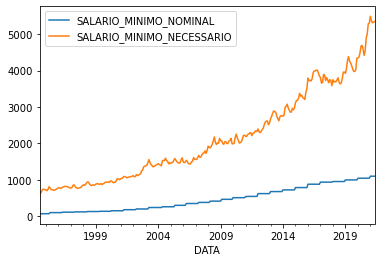

In [129]:
dieese_salarios_indexados[["SALARIO_MINIMO_NOMINAL", "SALARIO_MINIMO_NECESSARIO"]].plot()

<AxesSubplot:>

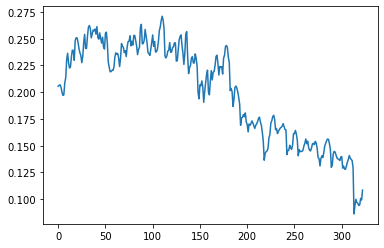

In [132]:
dieese_salarios["PERCENTUAL_NOMINAL_NECESSARIO"].plot()

### Granunalizando dados: Distribuindo colunas de SALÁRIO em linhas

In [137]:
dieese_salario_nominal = dieese_salarios[["DATA", "SALARIO_MINIMO_NOMINAL"]].copy()
dieese_salario_nominal["TIPO_SALARIO"] = "NOMINAL"
dieese_salario_nominal = dieese_salario_nominal.rename(columns = {'SALARIO_MINIMO_NOMINAL':'VALOR_SALARIO'})

dieese_salario_necessario = dieese_salarios[["DATA", "SALARIO_MINIMO_NECESSARIO"]].copy()
dieese_salario_necessario["TIPO_SALARIO"] = "NECESSARIO"
dieese_salario_necessario = dieese_salario_necessario.rename(columns = {'SALARIO_MINIMO_NECESSARIO':'VALOR_SALARIO'})

dieese_salario_granulado = dieese_salario_necessario.append(dieese_salario_nominal)
dieese_salario_granulado

KeyError: "['DATA', 'DIFERENCA_MENSAL_NOMINAL'] not in index"

In [136]:
df = px.data.stocks()
fig = px.line(dieese_salario_granulado, x='DATA', y="VALOR_SALARIO", color='TIPO_SALARIO', hover_name='TIPO_SALARIO')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

## Calculando a variação salarial mensal

In [141]:
dieese_salarios_indexados = dieese_salarios.set_index("DATA")
dieese_salarios_indexados['DATA'] = dieese_salarios_indexados.index
dieese_salarios_indexados.sort_index(ascending=True, inplace=True)
dieese_salarios_indexados

,SALARIO_MINIMO_NOMINAL,SALARIO_MINIMO_NECESSARIO,PERCENTUAL_NOMINAL_NECESSARIO,DATA
DATA,,,,
1994-07-01,64.0,590.0,0.108475,1994-07-01
1994-08-01,64.0,645.0,0.099225,1994-08-01
1994-09-01,70.0,695.0,0.100719,1994-09-01
1994-10-01,70.0,740.0,0.094595,1994-10-01
1994-11-01,70.0,744.0,0.094086,1994-11-01
...,...,...,...,...
2021-01-01,1100.0,5495.0,0.200182,2021-01-01
2021-02-01,1100.0,5375.0,0.204651,2021-02-01
2021-03-01,1100.0,5315.0,0.206961,2021-03-01


<AxesSubplot:xlabel='DATA'>

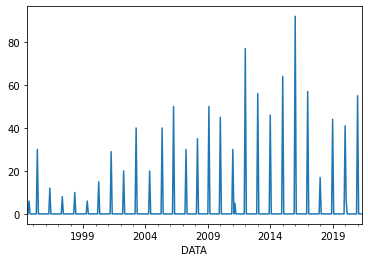

In [142]:
dieese_salarios_indexados["DIFERENCA_MENSAL_NOMINAL"] = dieese_salarios_indexados["SALARIO_MINIMO_NOMINAL"].diff()
dieese_salarios_indexados["DIFERENCA_MENSAL_NOMINAL"].plot()

<AxesSubplot:xlabel='DATA'>

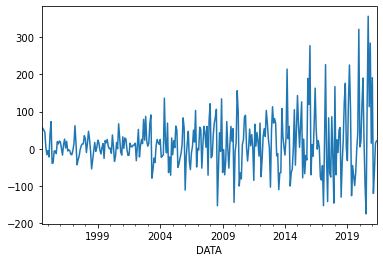

In [143]:
dieese_salarios_indexados["DIFERENCA_MENSAL_NECESSARIO"] = dieese_salarios_indexados["SALARIO_MINIMO_NECESSARIO"].diff()
dieese_salarios_indexados["DIFERENCA_MENSAL_NECESSARIO"].plot()

<AxesSubplot:xlabel='DATA'>

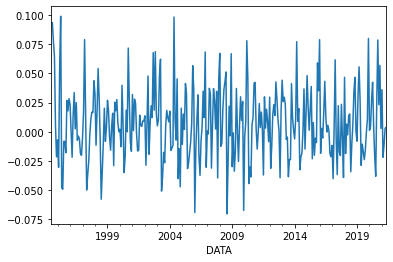

In [146]:
dieese_salarios_indexados["SALARIO_MINIMO_NECESSARIO"].pct_change().plot()

In [85]:
dieese_salario_nominal = dieese_salarios_indexados[["DATA", "SALARIO_MINIMO_NOMINAL", "DIFERENCA_MENSAL_NOMINAL"]].copy()
dieese_salario_nominal["TIPO_SALARIO"] = "NOMINAL"
dieese_salario_nominal = dieese_salario_nominal.rename(columns = {
    'SALARIO_MINIMO_NOMINAL':'VALOR_SALARIO',
    'DIFERENCA_MENSAL_NOMINAL' : 'DIFERENCA_MENSAL'
})

dieese_salario_necessario = dieese_salarios_indexados[["DATA", "SALARIO_MINIMO_NECESSARIO", "DIFERENCA_MENSAL_NECESSARIO"]].copy()
dieese_salario_necessario["TIPO_SALARIO"] = "NECESSARIO"
dieese_salario_necessario = dieese_salario_necessario.rename(columns = {
    'SALARIO_MINIMO_NECESSARIO':'VALOR_SALARIO',
    'DIFERENCA_MENSAL_NECESSARIO' : 'DIFERENCA_MENSAL'})

dieese_salario_granulado = dieese_salario_necessario.append(dieese_salario_nominal)
dieese_salario_granulado

,MES,ANO,SALÁRIO_MÍNIMO_NOMINAL,SALÁRIO_MÍNIMO_NECESSÁRIO
DATA,,,,
1994-07-01,Julho,1994,64.0,590.0
1994-08-01,Agosto,1994,64.0,645.0
1994-09-01,Setembro,1994,70.0,695.0
1994-10-01,Outubro,1994,70.0,740.0
1994-11-01,Novembro,1994,70.0,744.0
...,...,...,...,...
2021-01-01,Janeiro,2021,1100.0,5495.0
2021-02-01,Fevereiro,2021,1100.0,5375.0
2021-03-01,Março,2021,1100.0,5315.0


In [109]:
fig = px.line(dieese_salario_granulado, x='DATA', y="DIFERENCA_MENSAL", color='TIPO_SALARIO', hover_name='TIPO_SALARIO')
fig.update_xaxes(rangeslider_visible=True)
fig.show()